# 雷达数据的切片

In [ ]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart
grad_data = pyart.io.read_grid('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/grid.nc')


In [4]:
display = pyart.graph.GridMapDisplay(grad_data)

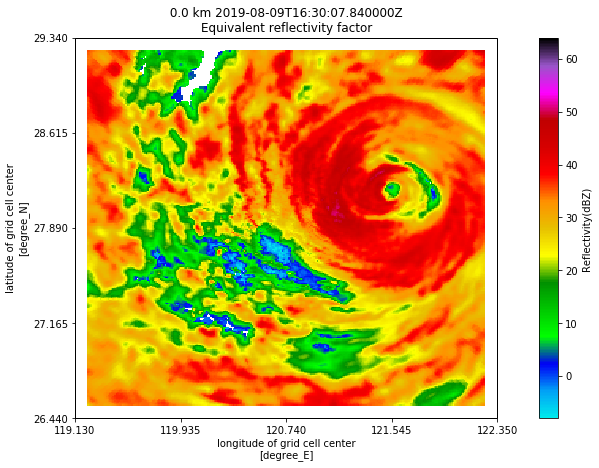

In [7]:
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
level = 0
vmin = -8
vmax = 64
# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
#display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
lat_min, lat_max, lon_min, lon_max = display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)

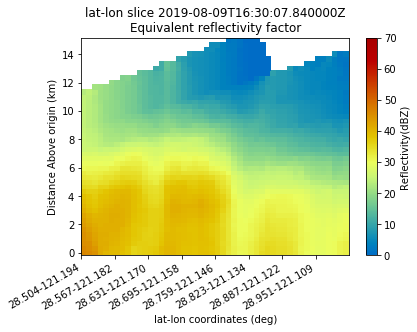

In [9]:
x, z, data = display.plot_latlon_slice("reflectivity", coord1=(121.2, 28.5), coord2=(121.1, 28.0),vmin=0,vmax=70)

# 测试